# Census Self Response Graphics
##### Ivana Moore

###### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

###### Read in the 2010 census self response file and remove incomplete data 

In [2]:
nyc = pd.read_excel('../data/nycounty.xlsx')
nyc.drop(nyc[nyc['MailReturnRateCen2010']>100].index, inplace=True)
nyc.drop(nyc[nyc['LowResponseScore']>100].index, inplace=True)

###### Read in the 3/30 2020 Census Self Response File, Create Harlem-specific tract list

In [3]:
self_response_2020 = pd.read_csv('../data/nyc_self_response.csv')

In [4]:
harlem_tracts = [23700, 23300, 23501, 23502, 22900, 23100, 23600, 22500, 23400, 25900, 22700, 22301, 23200, 22302, 22102, 21900, 21703, 23000, 21400, 22800, 21500, 22600, 21200, 21303, 21000, 20901, 22400, 20800, 25700, 20600, 22200, 20000, 24200, 22000, 20102, 19800, 21800, 19600, 19702, 19000, 19200, 19400, 21600, 18400, 18600, 18200, 18800, 17402, 17401, 18000, 17200, 16800, 17000, 24000, 16600, 16400, 16002, 15802, 16200, 15602]

## 2010 Final Census Self-Response Rates

Getting 2010 Census Self-Response Final Rates for each group

In [5]:
black_2010 = nyc[nyc['PctBlackAloneOrCombo_TotPopDenom']>.50][['GEOIDtxt','MailReturnRateCen2010']]
    
latinx_2010 =  nyc[nyc['PctHispanic_TotPopDenom']>.50][['GEOIDtxt','MailReturnRateCen2010']]

asian_2010 =  nyc[nyc['PctAsianAloneOrCombo_TotPopDenom']>.50][['GEOIDtxt','MailReturnRateCen2010']]

lim_eng_2010 =  nyc[nyc['PctLEPHHs_TotHHDenom']>.50][['GEOIDtxt','MailReturnRateCen2010']]

foreign_pop_2010 =  nyc[nyc['PctTotPopBornOutUS_TotPopDenom']>.50][['GEOIDtxt','MailReturnRateCen2010']]

poverty_2010 = nyc[nyc['PctPoverty_Less100_PovDenom']>.50][['GEOIDtxt','MailReturnRateCen2010']]

no_internet_2010 =  nyc[nyc['PctNoInternet_TotHHDenom']>.50][['GEOIDtxt','MailReturnRateCen2010']]

Create DataFrame

In [6]:
group_names_2010_harlem = np.array(['Black', 'Latinx', 'Asian', 'Foreign-born'])
group_labels_2010_harlem = np.repeat(group_names_2010_harlem,[len(black_2010), len(latinx_2010), len(asian_2010), len(foreign_pop_2010)],axis=0)
census_2010_harlem= black_2010.append(latinx_2010).append(asian_2010).append(foreign_pop_2010)
census_2010_harlem['group'] = group_labels_2010_harlem


census_2010_harlem['Harlem']='None'


def create_geoid_harlem_2010(tracts):
    return [ str('360610') + str(t) for t in tracts ]

harlem_tracts_2010 = create_geoid_harlem_2010(harlem_tracts)



harlem_2010_list = []
for i in range(0, len(census_2010_harlem)):
    if census_2010_harlem.iloc[i]['GEOIDtxt'] in [int(j) for j in harlem_tracts_2010]:
        harlem_2010_list.append('Harlem')        
    else:
        harlem_2010_list.append('Other')

census_2010_harlem['Harlem'] = harlem_2010_list
census_2010_harlem.columns=['tract','SelfResponse','Group','Harlem']

## Census 2020 Self-Response Rates

In [7]:
black_20 = nyc[nyc['PctBlackAloneOrCombo_TotPopDenom']>.50]['GEOIDtxt'].tolist()
latinx_20 =  nyc[nyc['PctHispanic_TotPopDenom']>.50]['GEOIDtxt'].tolist()
asian_20 =  nyc[nyc['PctAsianAloneOrCombo_TotPopDenom']>.50]['GEOIDtxt'].tolist()
lim_eng_20 = nyc[nyc['PctLEPHHs_TotHHDenom']>.50]['GEOIDtxt'].tolist()
foreign_pop_20 = nyc[nyc['PctTotPopBornOutUS_TotPopDenom']>.50]['GEOIDtxt'].tolist()
poverty_20 = nyc[nyc['PctPoverty_Less100_PovDenom']>.50]['GEOIDtxt'].tolist()
no_internet_20 = nyc[nyc['PctNoInternet_TotHHDenom']>.50]['GEOIDtxt'].tolist()


In [8]:
def get_response(tract_list):
    empty_list=[]
    for i in tract_list:
        j=str('1400000US') + str(i)
        try:
            empty_list.append(self_response_2020[self_response_2020.GEO_ID==j]['CRRALL'].values[0])
        except:
            empty_list.append(np.nan)
    return empty_list
                          
black_response = pd.DataFrame(get_response(black_20),black_20).reset_index()
latinx_response =pd.DataFrame(get_response(latinx_20), latinx_20).reset_index()
asian_response = pd.DataFrame(get_response(asian_20), asian_20).reset_index()
lim_eng_response = pd.DataFrame(get_response(lim_eng_20), lim_eng_20).reset_index()
foreign_pop_response = pd.DataFrame(get_response(foreign_pop_20), foreign_pop_20).reset_index()
poverty_response = pd.DataFrame(get_response(poverty_20), poverty_20).reset_index()
no_internet_response = pd.DataFrame(get_response(no_internet_20), no_internet_20).reset_index()


In [9]:
group_names_2020 = np.array(['Black', 'Latinx', 'Asian','Foreign-born'])
group_labels_2020 = np.repeat(group_names_2020,[len(black_response), len(latinx_response), len(asian_response), len(foreign_pop_response)],axis=0)
census_2020 = black_response.append(latinx_response).append(asian_response).append(foreign_pop_response)
census_2020['group'] = group_labels_2020
census_2020.columns = ['tract','SelfResponse','Group']

In [10]:
def create_geoid_harlem_2010(tracts):
    return [ str('360610') + str(t) for t in tracts ]

harlem_tracts_2010 = create_geoid_harlem_2010(harlem_tracts)

test2 = []
for i in range(0, len(census_2020)):
    if census_2020.iloc[i]['tract'] in [int(j) for j in harlem_tracts_2010]:
        test2.append('Harlem')
    else:
        test2.append('Other')

census_2020['Harlem'] = test2


## Plotting

In [11]:
title_base = ' self-response rate for tracts with at least 50 percent of population in demographic group'

def plot_data(data, is_2010 = True):
    plt.figure(figsize=(9, 8))
    
    if is_2010: plt.ylim(55, 95)
    else: plt.ylim(0, 40)

    ax = sns.swarmplot(x='Group', y='SelfResponse', hue='Harlem',data = data, color ='steelblue', size=8)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(str(2010 if is_2010 else 2020) + title_base, y = 1.05)    
    ax.set_yticklabels(['{:,.0%}'.format(x/100) for x in ax.get_yticks()])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_legend().remove()

    mean_input = nyc.MailReturnRateCen2010 if is_2010 else self_response_2020.CRRALL
    plt.axhline(y=np.mean(mean_input), color = 'red')
    plt.savefig('../outputs/' + '2010.pdf' if is_2010 else '2020.pdf')

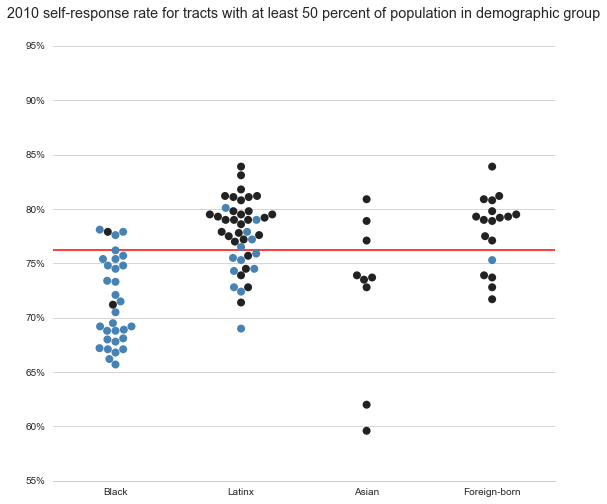

In [12]:
plot_data(census_2010_harlem, is_2010 = True)

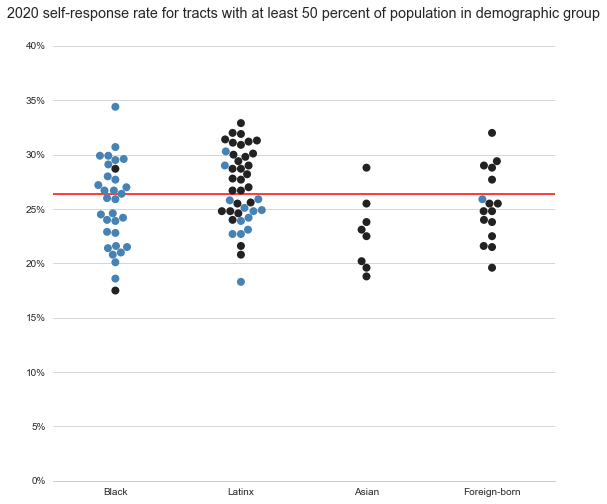

In [13]:
plot_data(census_2020, is_2010 = False)